In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [9]:
filename='/content/drive/MyDrive/Coding Dojo/Week 5/food-sales-predictions'
df=pd.read_csv(filename)
df.drop(columns='Profit',inplace=True)

In [10]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis


In [11]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
df.shape

(8523, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [14]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011782,0.025891,-0.006231,0.011807
Item_Visibility,-0.011782,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.025891,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.006231,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011807,-0.128625,0.567574,-0.049135,1.000000


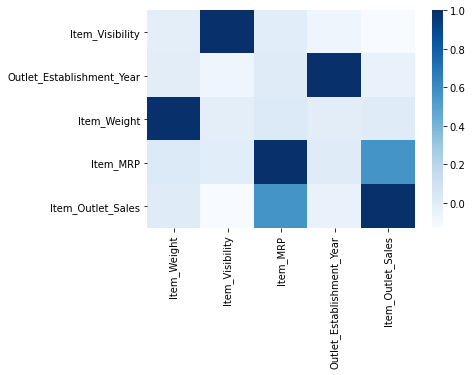

In [15]:
sns.heatmap(df.corr().sort_values(by='Item_Outlet_Sales'),cmap='Blues');

Based on the correlation method, Item_MRP is more associated with outlet sales

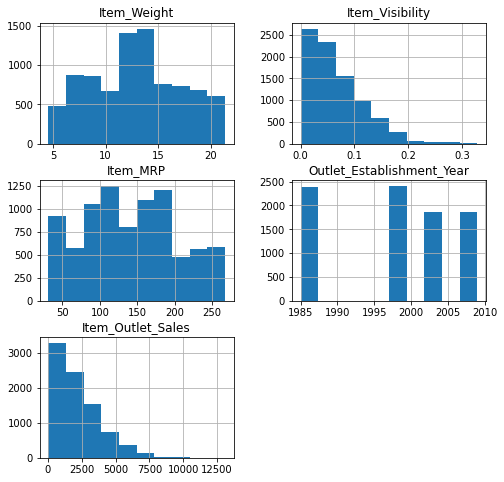

In [16]:
df.hist(figsize=(8,8));

# Dealing with categorical variables

In [17]:
# Item fat content is ordinal categorical variables
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [18]:
# Create dictionary and map the dictionary
fat={'Low Fat':0,'Regular':1}
df['Item_Fat_Content']=df['Item_Fat_Content'].map(fat)

In [19]:
# Outlet content is ordinal categorical variables
df['Outlet_Size'].value_counts()

Small     4798
Medium    2793
High       932
Name: Outlet_Size, dtype: int64

In [20]:
# Create dictionary and map the dictionary
size={'Small':0,'Medium':1,'High':2}
df['Outlet_Size']=df['Outlet_Size'].map(size)

In [21]:
# Drop two columns that are not associated with outlet sales
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [22]:
# Deal with nominal categorical variables
dum_columns=['Item_Type','Outlet_Location_Type','Outlet_Type']
df_reg=pd.get_dummies(df, columns=dum_columns ,drop_first=True)

In [23]:
df_reg.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1999,1,3735.1380,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,2009,1,443.4228,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
2,17.50,0,0.016760,141.6180,1999,1,2097.2700,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1998,0,732.3800,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,1987,2,994.7052,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0


# Linear Regression

In [24]:
X=df_reg.drop(columns='Item_Outlet_Sales').values
y=df_reg['Item_Outlet_Sales'].values
reg=LinearRegression(fit_intercept=True)
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [25]:
reg.predict(X[0:10])

array([4039.4382976 ,  559.75439152, 2393.86047944, 1090.15104068,
        897.2976731 ,  640.69561545, 1020.20439123, 3154.57860994,
       1633.5508439 , 3069.11954449])

In [26]:
reg.score(X,y)

0.5629845735050703

# KNN Regression

In [27]:
# Standardization
scaler=StandardScaler()
scaler.fit(X)
scaler.transform(X)

array([[-0.83921548, -0.73814723, -0.97073217, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.63780108,  1.35474328, -0.90811123, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 1.09818156, -0.73814723, -0.95691733, ...,  0.72680189,
        -0.34955064, -0.35102831],
       ...,
       [-0.53206717, -0.73814723, -0.59978449, ...,  0.72680189,
        -0.34955064, -0.35102831],
       [-1.33301545,  1.35474328,  1.53287976, ..., -1.37589075,
         2.86081583, -0.35102831],
       [ 0.46025814, -0.73814723, -0.41193591, ...,  0.72680189,
        -0.34955064, -0.35102831]])

In [28]:
knn_reg=KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(X,y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [29]:
knn_reg.predict(X[0:10])

array([2495.86226667,  811.38826667, 3991.471     , 1098.12613333,
        733.7116    ,  440.7596    ,  473.3838    , 2386.44913333,
       1168.70093333, 3898.9248    ])

In [30]:
knn_reg.score(X,y)

0.6957337599674358